## Object Detection using pre trained model

In [1]:
import cv2
import matplotlib.pyplot as plt


In [2]:
# Loading pre trained SSD-Mobilenet Model
config_file = "ssd_mobilenet_v3_large_coco_2020_01_14.pbtxt"
frozen_model = "frozen_inference_graph.pb"

In [3]:
model = cv2.dnn_DetectionModel(frozen_model,config_file)

In [4]:
classLabels = []
file = 'labels.txt'
with open(file,'rt') as fpt:
    classLabels = fpt.read().rstrip('\n').split('\n')

In [5]:
print(classLabels)

['person', 'bicycle', 'car', 'motorbike', 'aeroplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'sofa', 'pottedplant', 'bed', 'diningtable', 'toilet', 'tvmonitor', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush']


In [6]:
# Loading the model
model.setInputSize(320,320)
model.setInputScale(1.0/127.5)
model.setInputMean((127.5,127.5,127.5))
model.setInputSwapRB(True)

< cv2.dnn.Model 000002962F07FCB0>

### Reading an image

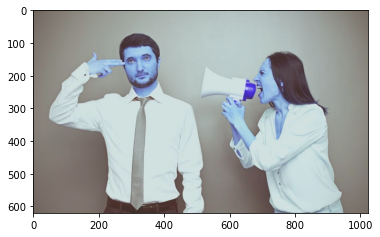

In [7]:
img = cv2.imread('2.jpg')
plt.imshow(img)

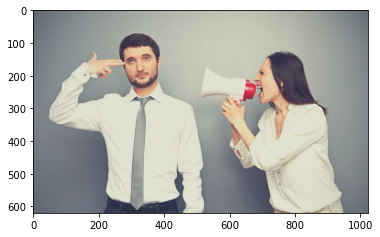

In [8]:

plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))

In [9]:
classIndex, confidence, box = model.detect(img,confThreshold=0.5)
print(classIndex)

[1 1]


In [10]:
# Annotating the image
for classInd, conf, boxes in zip(classIndex.flatten(),confidence.flatten(),box):
    cv2.rectangle(img,boxes,(255,0,0),4)
    cv2.putText(img,classLabels[classInd-1],(boxes[0]+10,boxes[1]+40), cv2.FONT_HERSHEY_PLAIN, 5, (0,255,0), thickness=5)


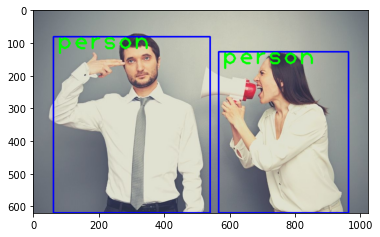

In [11]:
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))

### For video input

In [26]:
cap = cv2.VideoCapture(0)
# Check if video is opened correctly
if not cap.isOpened():
    cap = cv2.VideoCapture(0)
if not cap.isOpened():
    raise IOError("Cannot Open Camera")
cap.set(10,200)

while True:
    
    success, frame = cap.read()
    classIndex, confidence, box = model.detect(frame,confThreshold=0.55)
    if (len(classIndex)!=0):
        for classInd, conf, boxes in zip(classIndex.flatten(),confidence.flatten(),box):
            if (classInd <=80):
                cv2.rectangle(frame,boxes,(255,0,0),4)
                cv2.putText(frame,classLabels[classInd-1],(boxes[0]+10,boxes[1]+40), cv2.FONT_HERSHEY_PLAIN, 3, (0,255,0), thickness=3)
    
    cv2.imshow("Object Detection Tutorial",frame)
    if cv2.waitKey(2) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()
    